
Problem Statement

In this project, the goal is to predict the Performance Index of students based on various features like Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, and Sample Question Papers Practiced. The Performance Index is a continuous numerical variable, and our task is to create a regression model to predict it.

Dataset Description

The dataset consists of the following columns:

Hours Studied: The number of hours a student has studied.

Previous Scores: The student's previous exam scores.

Extracurricular Activities: A categorical variable indicating whether the student participates in extracurricular activities (Yes/No).

Sleep Hours: The number of hours the student sleeps on average.

Sample Question Papers Practiced: The number of sample question papers the student has practiced.

Performance Index: The target variable we are trying to predict, which represents the student's overall performance.

Target Variable Analysis
The target variable is Performance Index, a numerical value that represents the student's performance in their exams. This value will serve as the output that the model will predict, and its relationship with the features will be analyzed to understand how well they predict performance.

Prediction Goal
The goal is to develop a predictive model that can accurately predict the Performance Index based on the available features. By analyzing how each feature influences the performance, we aim to create a regression model that can help in understanding and forecasting students' academic performance.

Youtube Link: https://www.youtube.com/watch?v=HZn67U58pBo

Github Link: https://github.com/Cm00243/project2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the CSV file
df = pd.read_csv("student_performance.csv")

# Display the data to verify it loaded correctly
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [2]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [3]:
#Remove duplicates
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\nDuplicates removed: {initial_shape[0] - df.shape[0]}")


Duplicates removed: 127


In [4]:
#Convert categorical variables to numeric
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

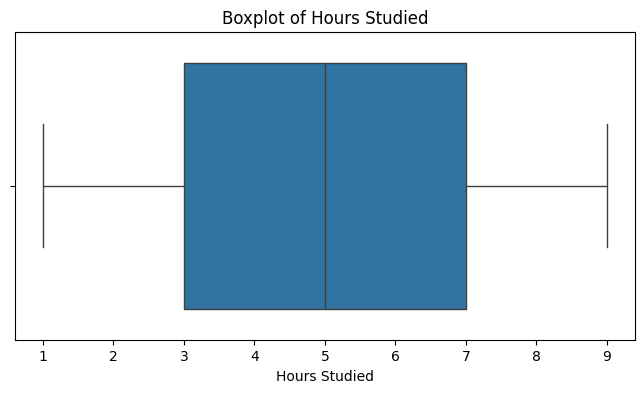

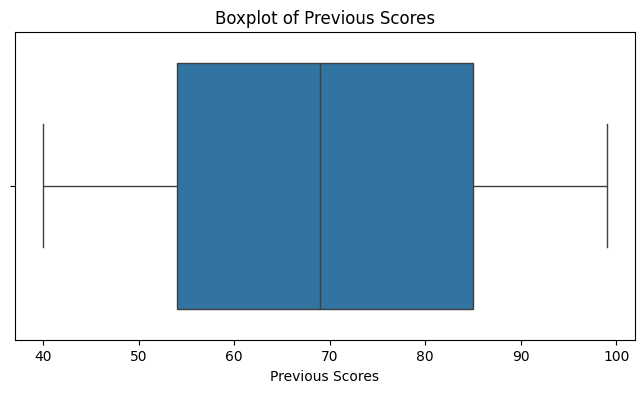

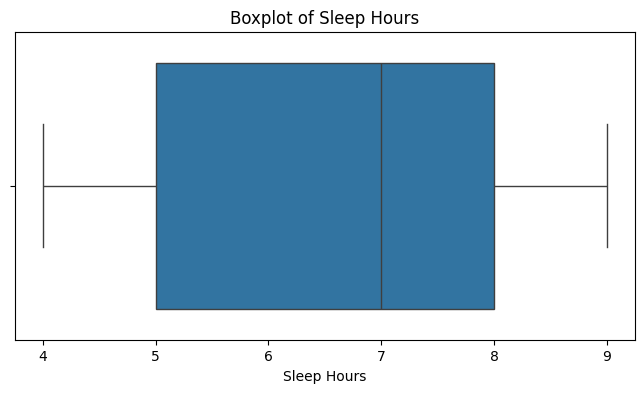

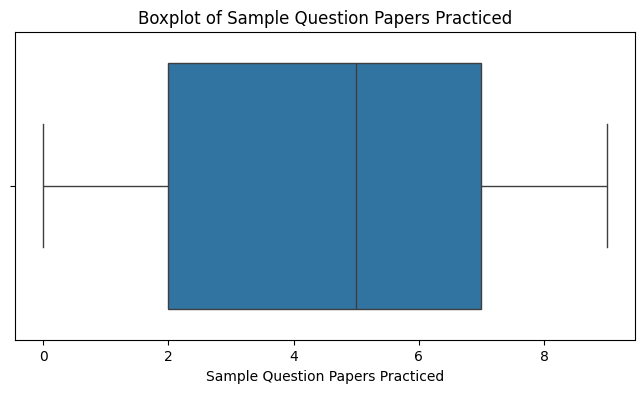

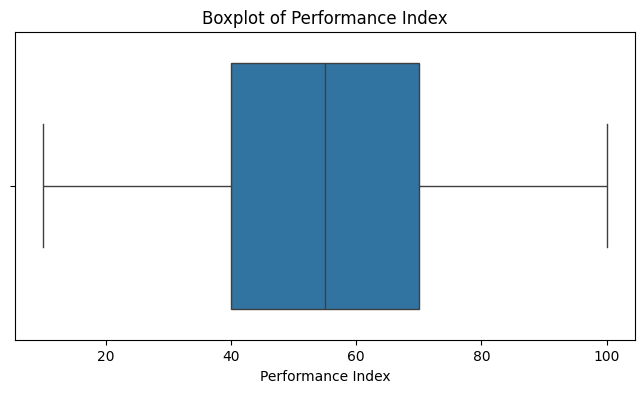

In [5]:
# Visualize numerical features using boxplots
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [6]:
#Identify and remove outliers
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
outliers_removed = {}

for col in numeric_columns:
    # Initial row count
    before_outliers = df.shape[0]
    
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    
    # Calculate the number of outliers removed
    after_outliers = df.shape[0]
    outliers_removed[col] = before_outliers - after_outliers


In [7]:
# Display the number of outliers removed for each column
print("\nNumber of outliers removed for each numeric column:")
for col, count in outliers_removed.items():
    print(f"{col}: {count} outliers removed")


Number of outliers removed for each numeric column:
Hours Studied: 0 outliers removed
Previous Scores: 0 outliers removed
Sleep Hours: 0 outliers removed
Sample Question Papers Practiced: 0 outliers removed
Performance Index: 0 outliers removed


Features with little to no variance: []


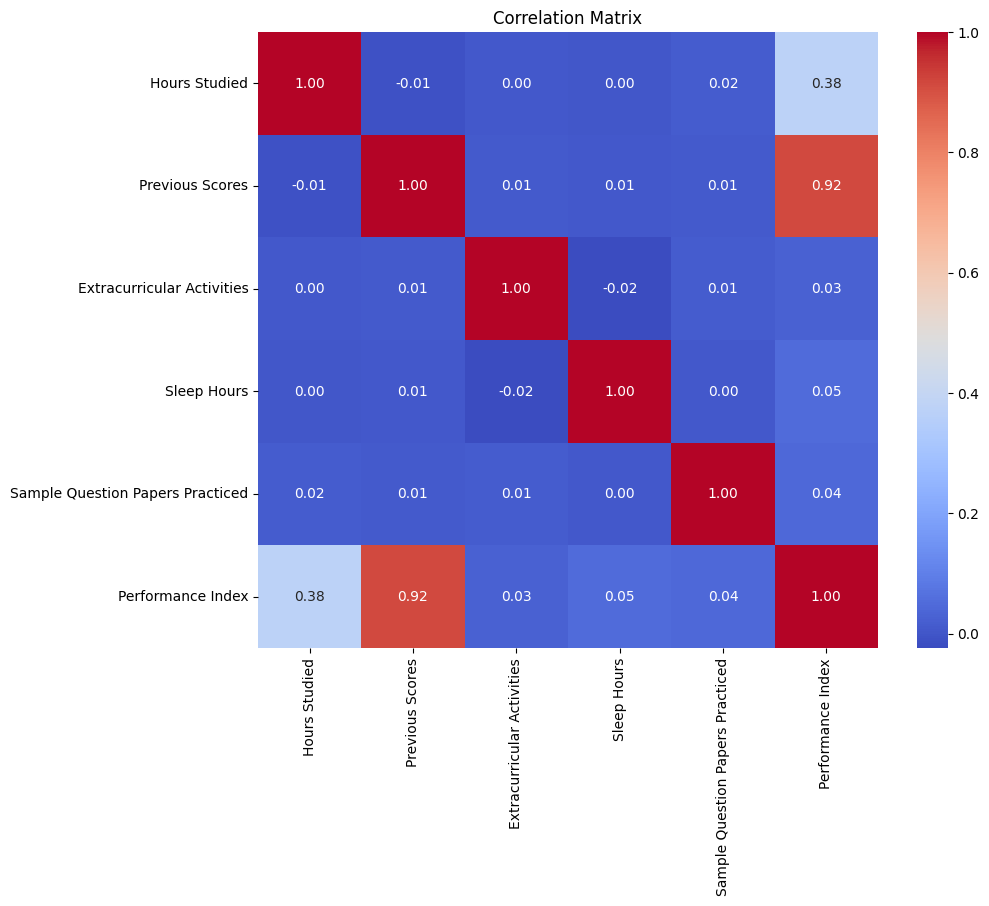

In [8]:
# Variance analysis
low_variance_features = [col for col in df.columns if df[col].nunique() == 1]
print("Features with little to no variance:", low_variance_features)

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Checking for highly correlated features (correlation > 0.8)
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix[col1][col2]) > 0.8]
print("Highly correlated feature pairs:", high_corr_pairs)


Highly correlated feature pairs: [('Previous Scores', 'Performance Index'), ('Performance Index', 'Previous Scores')]


In [10]:
# ANOVA Test for numerical features
# ANOVA requires the target to be categorical, so we can convert Performance Index into categories (e.g., bins)
df['Performance_Category'] = pd.qcut(df['Performance Index'], q=4, labels=[1, 2, 3, 4])
anova_results = {}
for feature in df.columns[:-2]:  # Exclude 'Performance Index' and 'Performance_Category'
    anova_results[feature] = f_classif(df[[feature]], df['Performance_Category'])[1][0]

print("\nANOVA p-values for each feature:")
for feature, p_value in anova_results.items():
    print(f"{feature}: {p_value}")




ANOVA p-values for each feature:
Hours Studied: 4.627786759449576e-254
Previous Scores: 0.0
Extracurricular Activities: 0.010045883026229383
Sleep Hours: 0.00029811574091327876
Sample Question Papers Practiced: 0.012150075392182567


In [11]:
# Chi-Squared Test for categorical variable
chi2_score, chi2_p = chi2(df[['Extracurricular Activities']], df['Performance_Category'])
print(f"\nChi-Squared test p-value for 'Extracurricular Activities': {chi2_p[0]}")

# Feature Scaling
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nData after scaling:")
print(df.head())


Chi-Squared test p-value for 'Extracurricular Activities': 0.1258898037542834

Data after scaling:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775566         1.706168                           1     1.454025   
1      -0.383205         0.724912                           0    -1.491315   
2       1.161822        -1.064438                           1     0.275889   
3       0.003052        -1.006717                           1    -0.902247   
4       0.775566         0.320865                           0     0.864957   

   Sample Question Papers Practiced  Performance Index Performance_Category  
0                         -1.249715           1.862979                    4  
1                         -0.900925           0.509348                    3  
2                         -0.900925          -0.531907                    2  
3                         -0.900925          -1.000471                    1  
4                          0.145444      

In [12]:
# Separate features and target variable
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model 
model = LinearRegression()

# Cross-validation for a more robust evaluation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean R² score from cross-validation:", cv_scores.mean())

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = np.mean((y_test - y_pred) ** 2)  
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Cross-validated R² scores: [0.98855029 0.98791429 0.98876193 0.98883027 0.98796186]
Mean R² score from cross-validation: 0.988403726767296

Evaluation Metrics on Test Data:
Mean Absolute Error (MAE): 0.08726555017427355
Mean Squared Error (MSE): 0.012060079652069067
Root Mean Squared Error (RMSE): 0.10981839396052497
R-squared (R²): 0.9880446845278523


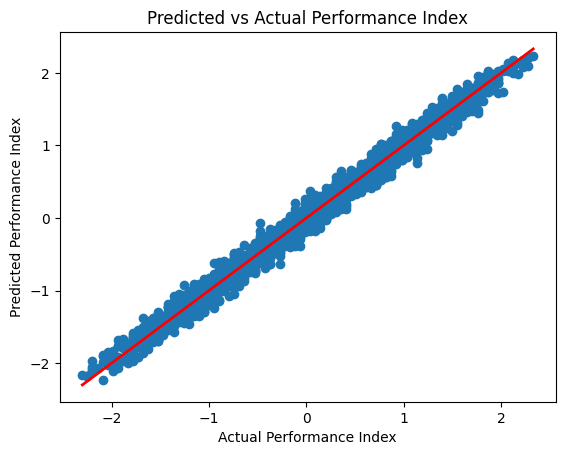

In [13]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Predicted vs Actual Performance Index')
plt.show()